In [1]:
# =======================================
# Author: Hung Tran-Nam
# Email: namhung34.info@gmail.com
# Repo: https://github.com/hungtrannam/probclust
# =======================================
# File: vis_dist.py
# Description: Visualize distances between probability distributions
# =======================================

In [2]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
import numpy as np
from scipy.stats import norm
from utils import dist
import matplotlib.pyplot as plt
from utils.vis import temp 

In [4]:
h       = 0.01
x       = np.arange(-50, 50, h)
f1      = norm.pdf(x, loc=0, scale=1)
mu_list = np.linspace(-10, 20, 1000)

L1_list, L2_list, H_list, BC_list, W_list, M_list, KLdiv_list, KLin_list = [], [], [], [], [], [], [],[]

for mu in mu_list:
	f2 = norm.pdf(x, loc=mu, scale=1)
	D = dist.Dist(h=h, Dim=1, grid=x)
	L1_list.append(D.L1(f1, f2))
	L2_list.append(D.L2(f1, f2))
	H_list.append(D.H(f1, f2))
	BC_list.append(D.BC(f1, f2))
	W_list.append(D.W2(f1, f2))
	M_list.append(D.M(f1, f2))
	KLdiv_list.append(D.KLdiv(f1, f2))
	KLin_list.append(D.KLinfo(f1, f2))
    

L1_list = np.array(L1_list)
L2_list = np.array(L2_list)
H_list = np.array(H_list)
W_list = np.array(W_list)
BC_list = np.array(BC_list)
M_list = np.array(M_list)
KLdiv_list= np.array(KLdiv_list)
KLin_list = np.array(KLin_list)


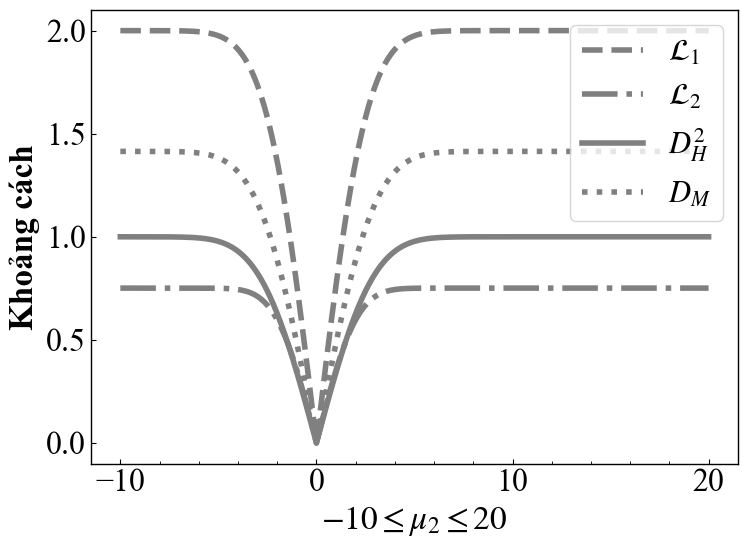

In [5]:
plt.figure(figsize=(8, 6))
temp(fontsize=24)

plt.plot(mu_list, L1_list, label=r'$\mathcal{L}_1$', linestyle='--', lw = 4, color = 'gray')
plt.plot(mu_list, L2_list, label=r'$\mathcal{L}_2$', linestyle='-.', lw=4, color = 'gray')
plt.plot(mu_list, H_list, label=r'$D^2_H$', linestyle='-', lw=4, color = 'gray')
plt.plot(mu_list, M_list, label=r'$D_{M}$', linestyle=':', lw=4, color = 'gray')
# plt.plot(mu_list, KL_list, label=r'$D_{KL}$', linestyle=':', lw=4, color = 'gray')


plt.xlabel(r'$-10\leq\mu_2\leq20$')
plt.ylabel('Khoảng cách')
plt.legend()
plt.tight_layout()
# plt.savefig('C1_dist.pdf')

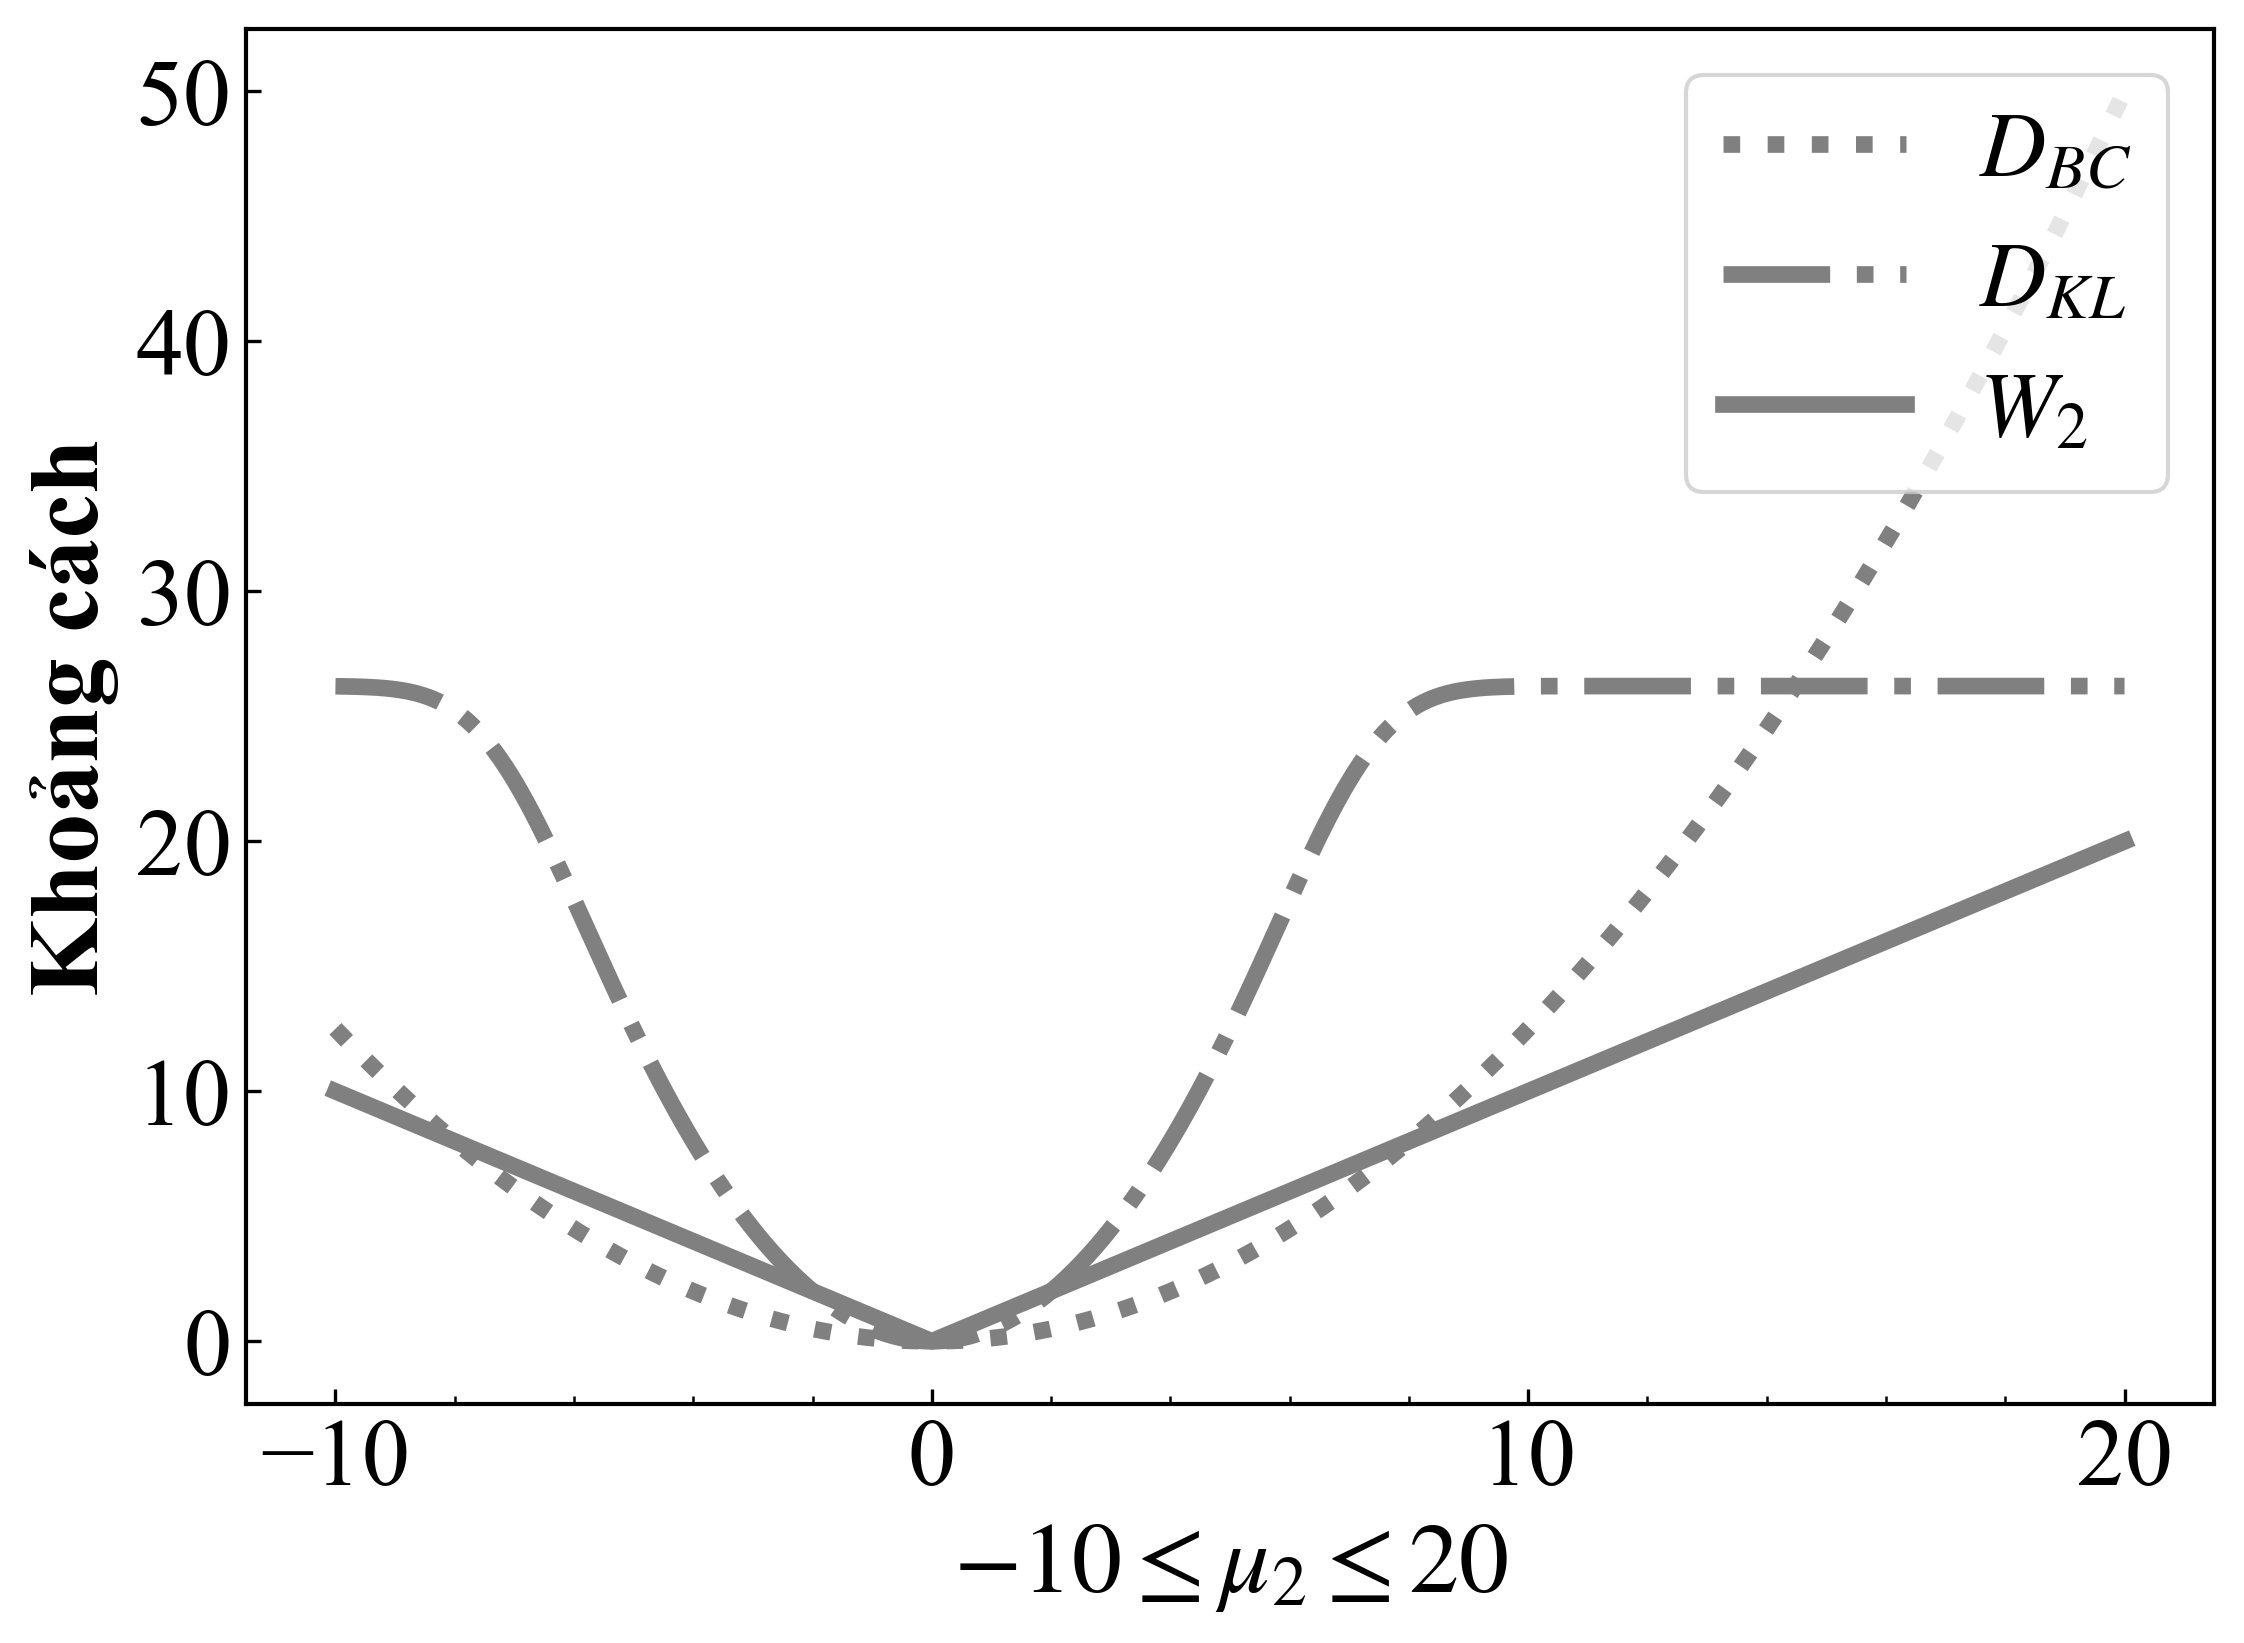

In [6]:
plt.figure(figsize=(8, 6))
temp(fontsize=24)

plt.plot(mu_list, BC_list, label=r'$D_{BC}$', linestyle=':', lw=4, color = 'gray')
plt.plot(mu_list, KLdiv_list, label=r'$D_{KL}$', linestyle='-.', lw=4, color = 'gray')
# plt.plot(mu_list, KLdiv_list, label=r'$D_{KL}$', linestyle='-.', lw=4, color = 'gray')

plt.plot(mu_list, W_list, label=r'$W_2$', linestyle='-', lw=4, color = 'gray')


plt.xlabel(r'$-10\leq\mu_2\leq20$')
plt.ylabel('Khoảng cách')
plt.legend()
plt.tight_layout()
# plt.savefig('C1_dist2.pdf')

In [7]:
from utils.integral import grid
from data.data_loader import generateGauss, generateUniform
from utils import dist
import numpy as np

bandwidth = 0.001
grid_x    = grid(bandwidth, start=0, end=8)
f1        = generateUniform(2, 3, grid_x)
f2        = generateUniform(5, 6, grid_x)

D = dist.Dist(h=bandwidth, Dim=1, grid=grid_x)

L1_list = D.L1(f1, f2)
L2_list = D.L2(f1, f2)
H_list  = D.H(f1, f2)
BC_list = D.BC(f1, f2)
W_list  = D.W2(f1, f2)
M_list  = D.M(f1, f2)
KLdiv_list = D.KLdiv(f1, f2)
KLin_list  = D.KLinfo(f1, f2)
CWD_list   = D.CWD(f1,f2)
OVL_list   = D.OVL(f1,f2)


# ---- in ra màn hình ----
print("L1      :", L1_list)
print("L2      :", L2_list)
print("H       :", H_list)
print("BC      :", BC_list)
print("W2      :", W_list)
print("M       :", M_list)
print("KLdiv   :", KLdiv_list)
print("KLinfo  :", KLin_list)
print("CWD   :", CWD_list)
print("OVL  :", OVL_list)

L1      : 2.0020000000000002
L2      : 1.4149204924659196
H       : 1.000499875062461
BC      : 230.25850929940458
W2      : 2.9999062485351105
M       : 1.4149204924659196
KLdiv   : 27.658652137016826
KLinfo  : 27.65865213701682
CWD   : 1.0020000000000002
OVL  : 1.0
